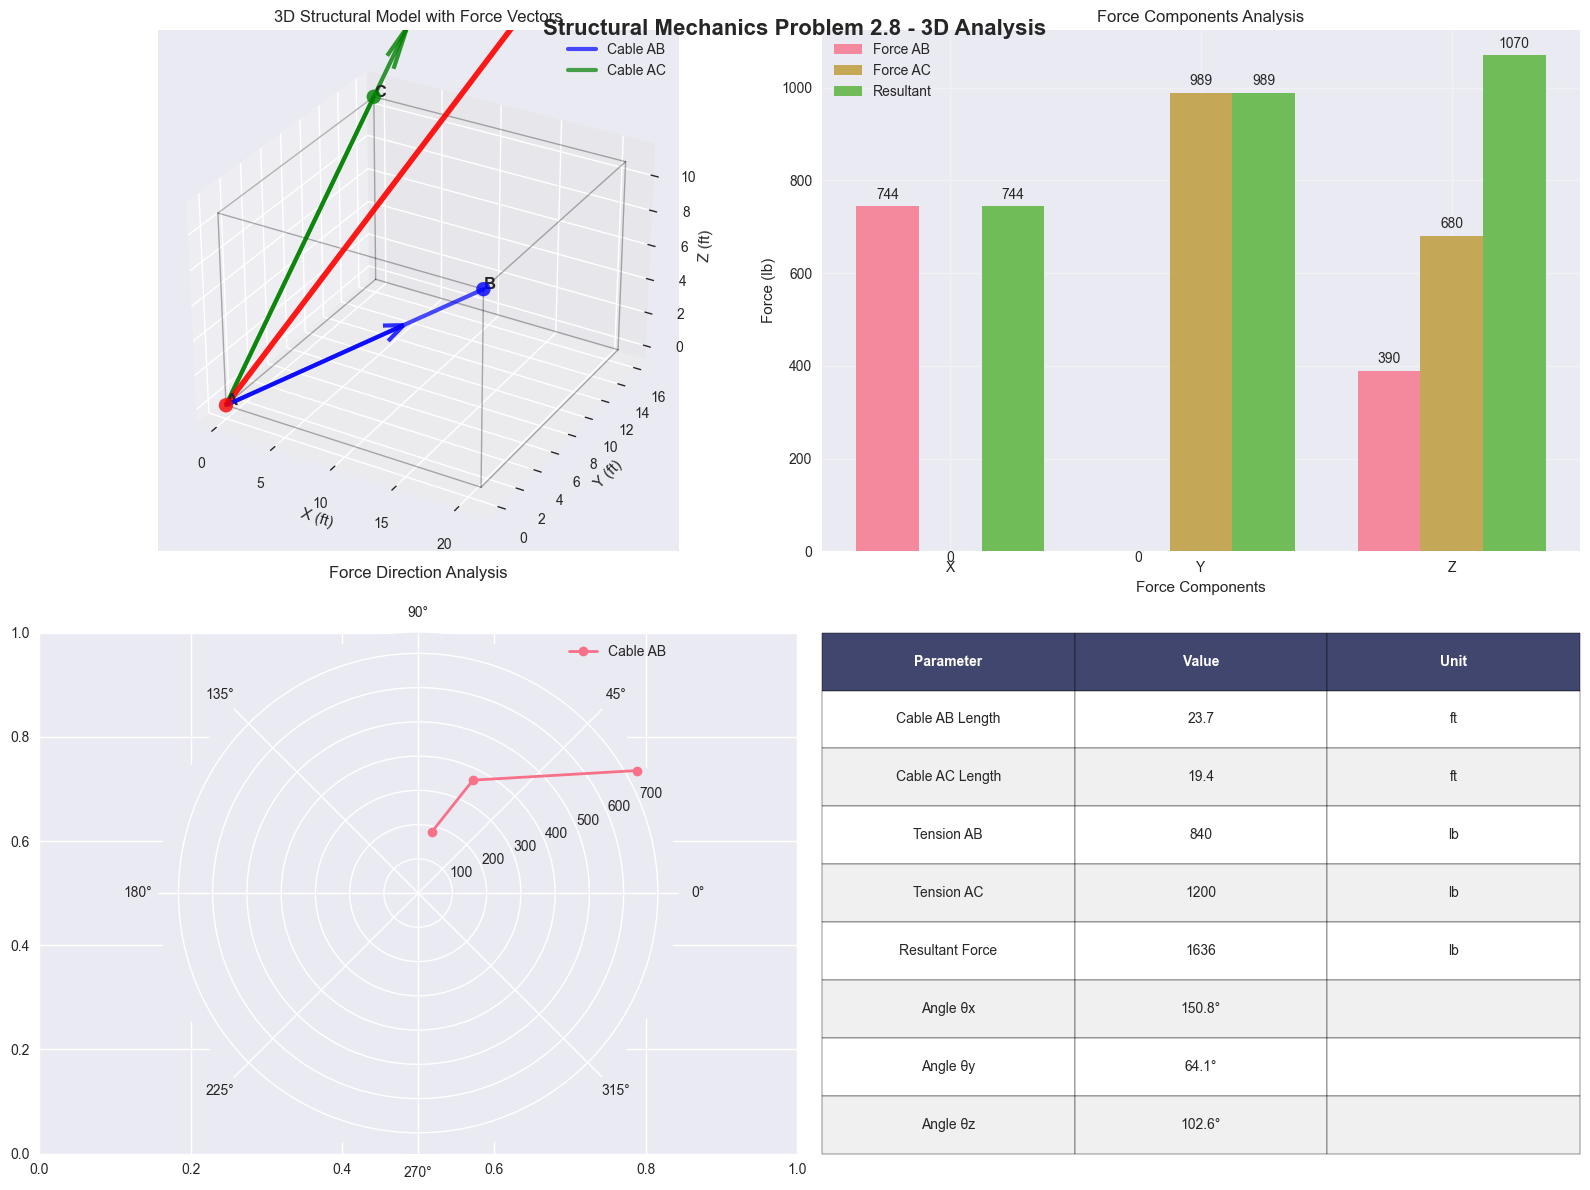

STRUCTURAL ANALYSIS RESULTS
Cable AB:
  Length: 23.71 ft
  Tension: 840 lb
  Force components: [744.1, 0.0, 389.8] lb

Cable AC:
  Length: 19.42 ft
  Tension: 1200 lb
  Force components: [0.0, 988.9, 679.8] lb

Resultant Force:
  Magnitude: 1635.7 lb
  Components: [744.1, 988.9, 1069.6] lb
  Direction angles: θx=150.8°, θy=64.1°, θz=102.6°


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# Problem data from the textbook
# Concrete section dimensions
width = 21  # ft
height = 11  # ft
depth = 16  # ft (assumed for 3D visualization)

# Cable forces and positions
T_AB = 840  # lb
T_AC = 1200  # lb

# Points coordinates (from the problem geometry)
A = np.array([0, 0, 0])  # Origin point
B = np.array([21, 0, 11])  # Point B
C = np.array([0, 16, 11])  # Point C

# Calculate unit vectors
AB_vec = B - A
AC_vec = C - A
AB_unit = AB_vec / np.linalg.norm(AB_vec)
AC_unit = AC_vec / np.linalg.norm(AC_vec)

# Force vectors
F_AB = T_AB * AB_unit
F_AC = T_AC * AC_unit
F_resultant = F_AB + F_AC

# Subplot 1: 3D Geometry and Forces
ax1 = fig.add_subplot(221, projection='3d')

# Draw the concrete section (simplified as a box outline)
corners = np.array([
    [0, 0, 0], [width, 0, 0], [width, depth, 0], [0, depth, 0],  # bottom
    [0, 0, height], [width, 0, height], [width, depth, height], [0, depth, height]  # top
])

# Define edges of the box
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # bottom edges
    [4, 5], [5, 6], [6, 7], [7, 4],  # top edges
    [0, 4], [1, 5], [2, 6], [3, 7]   # vertical edges
]

# Draw the concrete section
for edge in edges:
    points = corners[edge]
    ax1.plot3D(*points.T, 'k-', alpha=0.3, linewidth=1)

# Draw points A, B, C
points = np.array([A, B, C])
ax1.scatter(*points.T, c=['red', 'blue', 'green'], s=100, alpha=0.8)
ax1.text(*A, 'A', fontsize=12, fontweight='bold')
ax1.text(*B, 'B', fontsize=12, fontweight='bold')
ax1.text(*C, 'C', fontsize=12, fontweight='bold')

# Draw cables AB and AC
ax1.plot3D(*np.array([A, B]).T, 'b-', linewidth=3, alpha=0.7, label='Cable AB')
ax1.plot3D(*np.array([A, C]).T, 'g-', linewidth=3, alpha=0.7, label='Cable AC')

# Draw force vectors (scaled for visibility)
scale = 0.02
ax1.quiver(*A, *F_AB*scale, color='blue', arrow_length_ratio=0.1, linewidth=3, alpha=0.8)
ax1.quiver(*A, *F_AC*scale, color='green', arrow_length_ratio=0.1, linewidth=3, alpha=0.8)
ax1.quiver(*A, *F_resultant*scale, color='red', arrow_length_ratio=0.1, linewidth=4, alpha=0.9)

ax1.set_xlabel('X (ft)')
ax1.set_ylabel('Y (ft)')
ax1.set_zlabel('Z (ft)')
ax1.set_title('3D Structural Model with Force Vectors')
ax1.legend()

# Subplot 2: Force Component Analysis
ax2 = fig.add_subplot(222)

# Force components
components = ['X', 'Y', 'Z']
F_AB_components = F_AB
F_AC_components = F_AC
F_R_components = F_resultant

x_pos = np.arange(len(components))
width_bar = 0.25

bars1 = ax2.bar(x_pos - width_bar, F_AB_components, width_bar, label='Force AB', alpha=0.8)
bars2 = ax2.bar(x_pos, F_AC_components, width_bar, label='Force AC', alpha=0.8)
bars3 = ax2.bar(x_pos + width_bar, F_R_components, width_bar, label='Resultant', alpha=0.8)

ax2.set_xlabel('Force Components')
ax2.set_ylabel('Force (lb)')
ax2.set_title('Force Components Analysis')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(components)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + np.sign(height)*10,
                f'{height:.0f}', ha='center', va='bottom' if height > 0 else 'top')

# Subplot 3: Cable Tension and Angles
ax3 = fig.add_subplot(223)

# Calculate cable lengths and angles
L_AB = np.linalg.norm(AB_vec)
L_AC = np.linalg.norm(AC_vec)

# Direction cosines (from the problem solution)
cos_theta_x_AB = -1440/1650
cos_theta_y_AB = 720/1650
cos_theta_z_AB = -360/1650

cos_theta_x_AC = -800/1650
cos_theta_y_AC = 400/1650
cos_theta_z_AC = -800/1650

# Angles in degrees
theta_x_AB = np.arccos(abs(cos_theta_x_AB)) * 180/np.pi
theta_y_AB = np.arccos(abs(cos_theta_y_AB)) * 180/np.pi
theta_z_AB = np.arccos(abs(cos_theta_z_AB)) * 180/np.pi

# Create polar plot for angles
angles = np.array([theta_x_AB, theta_y_AB, theta_z_AB]) * np.pi/180
values_AB = np.array([T_AB * abs(cos_theta_x_AB), T_AB * abs(cos_theta_y_AB), T_AB * abs(cos_theta_z_AB)])

ax3_polar = plt.subplot(223, projection='polar')
theta_labels = np.linspace(0, 2*np.pi, 8, endpoint=False)
ax3_polar.plot(angles, values_AB, 'o-', linewidth=2, label='Cable AB')
ax3_polar.set_title('Force Direction Analysis', pad=20)
ax3_polar.legend()

# Subplot 4: Summary Table
ax4 = fig.add_subplot(224)
ax4.axis('tight')
ax4.axis('off')

# Create summary table data
table_data = [
    ['Parameter', 'Value', 'Unit'],
    ['Cable AB Length', f'{L_AB:.1f}', 'ft'],
    ['Cable AC Length', f'{L_AC:.1f}', 'ft'],
    ['Tension AB', f'{T_AB}', 'lb'],
    ['Tension AC', f'{T_AC}', 'lb'],
    ['Resultant Force', f'{np.linalg.norm(F_resultant):.0f}', 'lb'],
    ['Angle θx', '150.8°', ''],
    ['Angle θy', '64.1°', ''],
    ['Angle θz', '102.6°', '']
]

table = ax4.table(cellText=table_data[1:], colLabels=table_data[0], 
                  cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the header row
for i in range(len(table_data[0])):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color alternate rows
for i in range(1, len(table_data)):
    color = '#f0f0f0' if i % 2 == 0 else 'white'
    for j in range(len(table_data[0])):
        table[(i, j)].set_facecolor(color)

plt.tight_layout()
plt.suptitle('Structural Mechanics Problem 2.8 - 3D Analysis', 
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

# Print numerical results
print("="*60)
print("STRUCTURAL ANALYSIS RESULTS")
print("="*60)
print(f"Cable AB:")
print(f"  Length: {L_AB:.2f} ft")
print(f"  Tension: {T_AB} lb")
print(f"  Force components: [{F_AB[0]:.1f}, {F_AB[1]:.1f}, {F_AB[2]:.1f}] lb")

print(f"\nCable AC:")
print(f"  Length: {L_AC:.2f} ft") 
print(f"  Tension: {T_AC} lb")
print(f"  Force components: [{F_AC[0]:.1f}, {F_AC[1]:.1f}, {F_AC[2]:.1f}] lb")

print(f"\nResultant Force:")
print(f"  Magnitude: {np.linalg.norm(F_resultant):.1f} lb")
print(f"  Components: [{F_resultant[0]:.1f}, {F_resultant[1]:.1f}, {F_resultant[2]:.1f}] lb")
print(f"  Direction angles: θx=150.8°, θy=64.1°, θz=102.6°")
print("="*60)